In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
## Select some features from the dataset based on which we are going to construct the decision tree 
features = ["pclass","sex","fare","embarked","age"]
target = ["survived"]

In [26]:
# filling the features/columns with missing values - for that we will be using imputer from sklearn
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy = "mean")
titanic[["age"]] = median_imputer.fit_transform(titanic[["age"]])

most_frequent_imputer = SimpleImputer(strategy = "most_frequent")
titanic[["embarked","embark_town","deck"]]= most_frequent_imputer.fit_transform(titanic[["embarked","embark_town","deck"]])


In [27]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [28]:
## Encoding data --->>  for slected features - [age and embarked]
# we will do LabelEncoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"]= le.fit_transform(titanic["embarked"])



In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,28.0,1,0,7.2500,2,Third,man,True,C,Southampton,no,False
1,1,1,0,51.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,34.0,0,0,7.9250,2,Third,woman,False,C,Southampton,yes,True
3,1,1,0,47.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,47.0,0,0,8.0500,2,Third,man,True,C,Southampton,no,True


In [30]:
# split data into X and Y
X = titanic[features]
Y = titanic[target]

In [31]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,28.0
1,1,0,71.2833,0,51.0
2,3,0,7.9250,2,34.0
3,1,0,53.1000,2,47.0
4,3,1,8.0500,2,47.0


In [32]:
Y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [33]:
# train test split -->>
X_train, X_test, y_train, y_test = train_test_split(
    X, Y , test_size = 0.2, random_state = 42
)

In [34]:
X_test.head()

,pclass,sex,fare,embarked,age
709,3,1,15.2458,0,36.0
439,2,1,10.5000,2,41.0
840,3,1,7.9250,2,25.0
720,2,0,33.0000,2,10.0
39,3,0,11.2417,0,18.0


In [37]:
# Build Decision Tree Classifier Model -->>
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier()
dt_model = model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [38]:
y_pred = dt_model.predict(X_test)

In [39]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [41]:
# Model Evaluation --->>
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Decision Tree Model Evaluation")
print("  ---->>  Accuracy Score : ",accuracy_score(y_pred,y_test)*100,"%")
print("  ---->>  Precision Score : ",precision_score(y_pred,y_test)*100,"%")
print("  ---->>  Accuracy Score : ",recall_score(y_pred,y_test)*100,"%")
print("  ---->>  Accuracy Score : ",f1_score(y_pred,y_test)*100,"%")

Decision Tree Model Evaluation
  ---->>  Accuracy Score :  78.77094972067039 %
  ---->>  Precision Score :  77.02702702702703 %
  ---->>  Accuracy Score :  73.07692307692307 %
  ---->>  Accuracy Score :  75.0 %


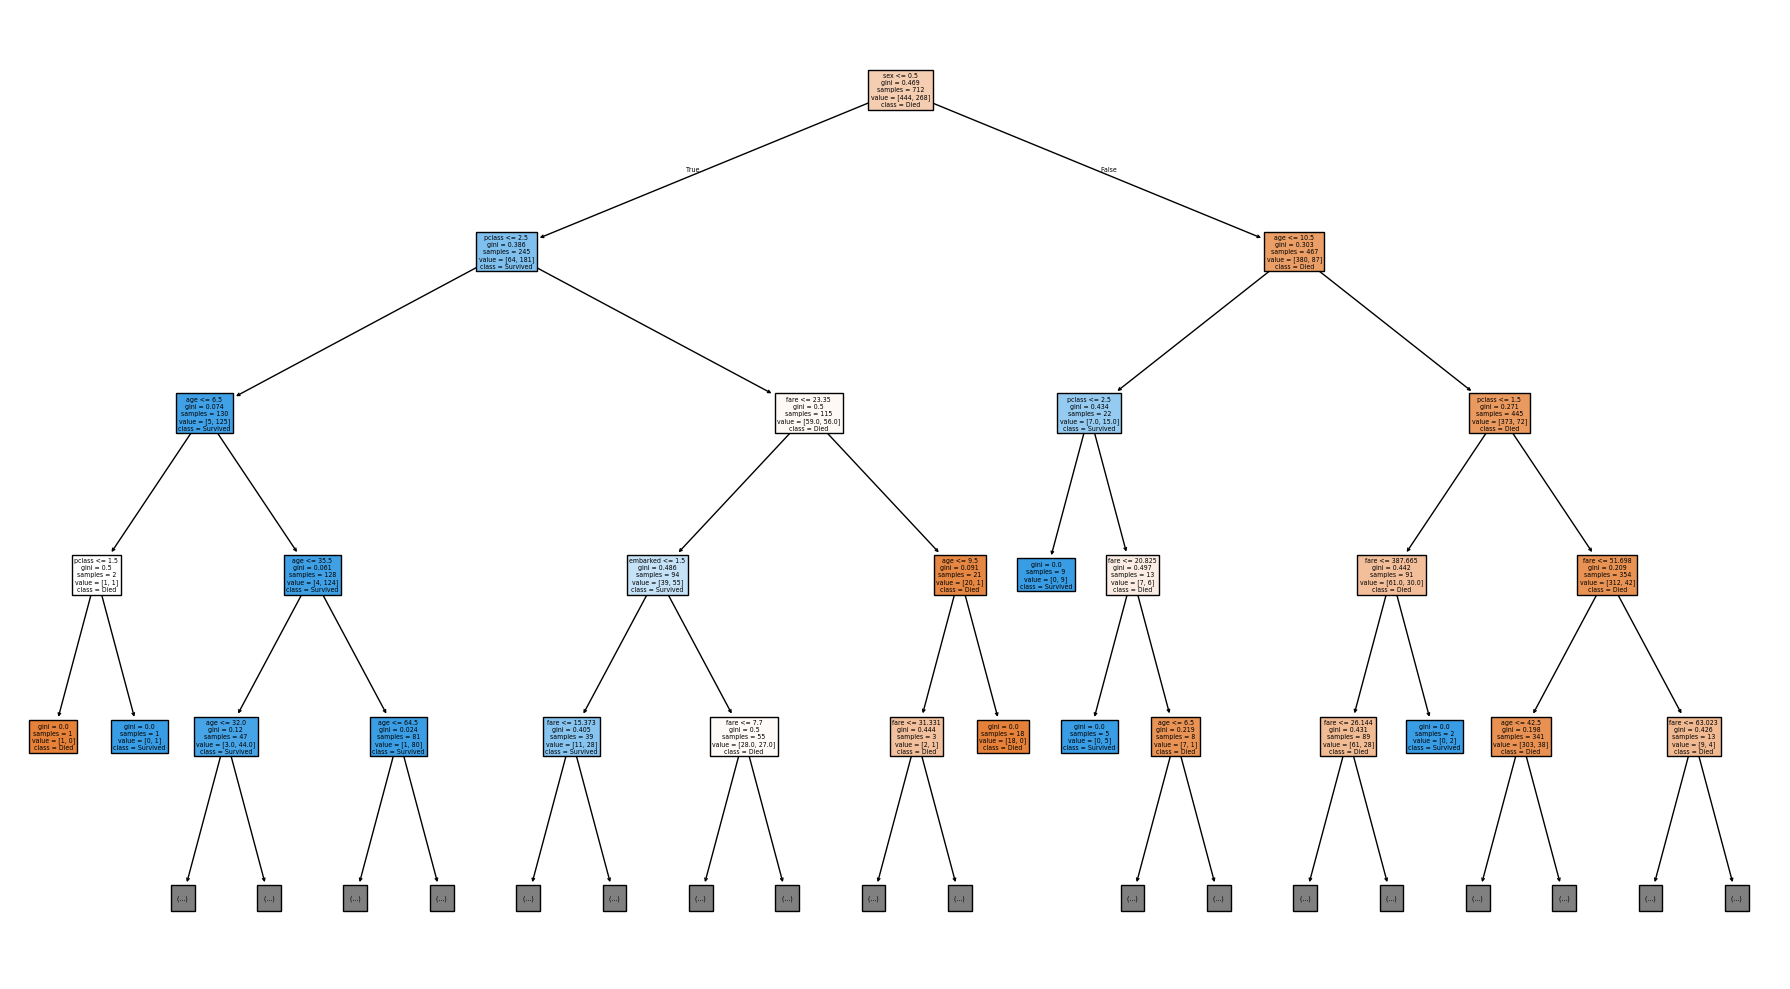

In [47]:
# Plot Decison Tree Model -->>
from sklearn.tree import plot_tree
plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    # max_depth = 4 // zooms the tree diagram and only show the defined depth level
)

plt.tight_layout()
plt.show()